In [2]:
#librerias
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.fftpack as fourier
import seaborn as sns
import sys  
sys.path.insert(0, 'C:/Users/consu/OneDrive/Documentos/GitHub/Tesis/Librerias')
import waves_simulation as ws

sns.set_style("darkgrid")

In [3]:
# Señal 
w1 = ws.SimulatedSignal(10)
wave = w1.signal()

w2 = ws.SimulatedSignal(15)
wave2 = w2.signal()

w3 = ws.SimulatedSignal(20)
wave3 = w3.signal()

w4 = ws.SimulatedSignal(25)
wave4 = w4.signal()

#creo 4 señales con diferentes frecuencias pero todas deberían cumplir con tener las singularidades
#por construcción de la señal

## **Clustering de señales**

### **Cosas por hacer**
* STFT y ver si haciendo un dataset con las frecuencias de cada parte de la señal se puede hacer un clustering
* Segmentar la señal y generar un dataframe de segmentos de señal, de manera de buscar un cluster en la señal base nomas
* Implementar wavelet para generar clusterings

## **SFTF**

In [4]:
# entonces tengo la señal w1 y esta la tengon que segmentar dada STFT
# para eso tengo que definir el tamaño de la ventana y el overlap

window_type = 'boxcar' #rectangular, Dirichlet or no-window type of wd 
w_size = 100 #length of the segments
overlap = 0.1*w_size #number of samples to overlap
amp = wave.max()
detrend_type = 'constant' #remove the mean value of the signal, can be 'linear' or False

#stft
f1, t1, Zxx1 = sig.stft(wave, fs=10, window=window_type, nperseg=w_size
, noverlap=overlap, detrend=False, boundary='zeros', padded=True, axis=-1, scaling = 'psd')


Entonces, Zxx1 corresponde a STFT de signal. Esta contiene 51 filas, corriespondientes a las frecuencias y 113 columnas correspondientes a los segmentos de la señal. La amplitud de cada frecuencia en cada segmento se encuentra en Zxx1.

Por default, la ultima columna de Zxx corresponde a un segmento de tiempo. Por lo tanto, si se quiere obtener la amplitud de una frecuencia en un segmento de tiempo, se debe acceder a Zxx[frecuencia][segmento de tiempo].

In [19]:
print(f't1 shape: \t{t1.shape}')
print(f'f1 shape: \t{f1.shape}')
print(f'Zxx1 shape:\t{Zxx1.shape}')

t1 shape: 	(113,)
f1 shape: 	(51,)
Zxx1 shape:	(51, 113)


c:\Users\consu\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


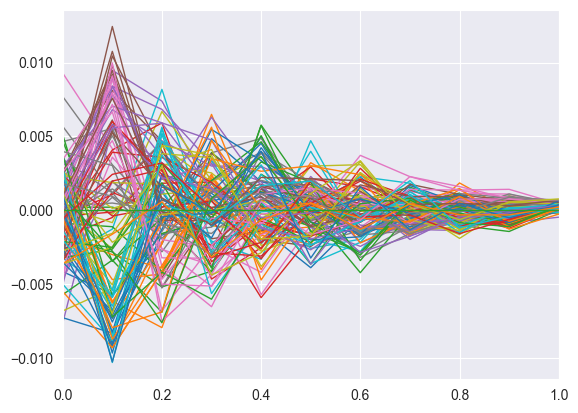

In [7]:
plt.plot(f1, Zxx1, lw=1)
plt.xlim(0,1)
plt.show()

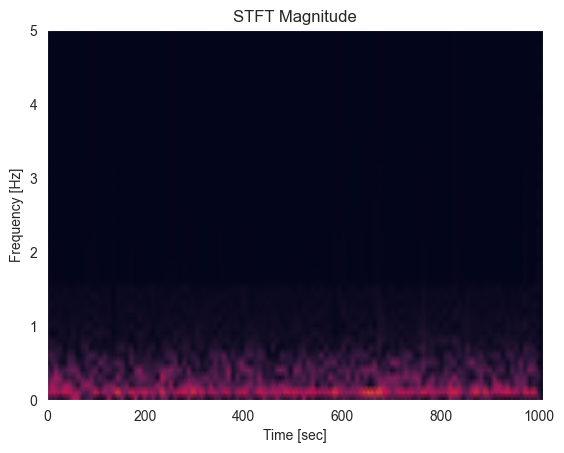

In [8]:
plt.pcolormesh(t1, f1, np.abs(Zxx1), vmin=0, vmax=amp, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

## **Clusters**

No sé como chucha hacer clusters con esto, voy a dejarlo hasta acá, porque mi cerebro no entiende bien como estoy haciendolo, maybe parto desde cero después de hacer el clustering con wavelet y con LCP.